<a href="https://www.kaggle.com/code/alawdisoft/heart-disease-feature-engneering?scriptVersionId=144380686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction of Data 👋</div>

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. Below is a description of the features collected for each patient: 


| # | Feature | Description
| --- | --- | --- 
| 1 | HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
| 2 | BMI | Body Mass Index (BMI)
| 3 | Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
| 4 | AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
| 5 | Stroke | (Ever told) (you had) a stroke?
| 6 | PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 
| 7 | MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
| 8 | DiffWalking | Do you have serious difficulty walking or climbing stairs?
| 9 | Sex | Are you male or female?
| 10 | AgeCategory | Fourteen-level age category
| 11 | Race | Imputed race/ethnicity value
| 12 | Diabetic | (Ever told) (you had) diabetes?
| 13 | PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| 14 | GenHealth | Would you say that in general your health is...
| 15 | SleepTime | On average, how many hours of sleep do you get in a 24-hour period?
| 16 | Asthma | (Ever told) (you had) asthma?
| 17 | KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| 18 | SkinCancer | (Ever told) (you had) skin cancer?

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Read and Analasis the  Data 👋</div>

**Import the important library** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde, gaussian_kde
from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

**Read data by pd.read_csv from pandas and save it in df**

In [ ]:
# Import Dataset
# df = pd.read_csv('G:\\tensorflow\\Feature Engineering Projects\\heart_2020_cleaned.csv')
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head(10)

**Show informations about the data**

In [ ]:
df.info()

**Describe the numerical  columns**

In [ ]:
df.describe()

*  **BMI** - **min**.: 12; **max**.: 94.8 - with a BMI of 94.8, a person must be extremely morbidly obese (which is not that extremely improbable, given the prevalence of obesity in the US);
* (**PhysicalHealth**, **MentalHealth**) - there is a daily scale, from 0 to 30 days, **outliers** are hard to find here
*  **SleepTime** - we can see that the mean as well as the median are quite close to each other: the average sleep time of the respondents is between 7 and 8 hours, but we also have strange answers, such as 1 hour or 24 hours, which doesn't seem to be possible. When excluding these values, you can use the interquartile range, exclude 5% of extreme observations or use some statistical tests to determine whether a certain observation is an outlier.
* **BMI** more than 60-70 is highly implausible. You may create a cap here to prevent unnecessary influence.
*  **SleepTime ,PhysicalHealth and  MentalHealth** are considered as continuous only integers, so we can treat them as discontinuous.
* **GenHealth** attribute is a measure of an individual's overall health. It is calculated by taking into account a variety of factors, including height, weight, age, sex, and lifestyle choices.




In [ ]:
############convert "SleepTime", "PhysicalHealth" and "MentalHealth" dtypes to category
df['SleepTime'] = df['SleepTime'].astype('object')
df['PhysicalHealth'] = df['PhysicalHealth'].astype('object')
df['MentalHealth'] = df['MentalHealth'].astype('object')

**Unique values in every coulmns**

In [ ]:
for col_n in df.columns:
    unq_val = len(df[col_n].unique())
    print("Feature '{col_n}' has '{unq_val}' unique values".format(col_n = col_n, unq_val=unq_val))


#### Shape the data

#### ------------Shape------------

In [ ]:
print("------------Shape------------")
print(df.shape)

#### --------------Null--------------

In [ ]:
print("------------Null------------")
print(df.isnull().sum())

#### --------------NAN--------------

In [ ]:
print("------------NAN------------")
print(df.isna().sum())

In [ ]:
# Get Information for Features and unique values in columns
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

**Ckeck duplicated rows**

In [ ]:
df.duplicated().sum()

**Heart Disease**

In [ ]:
#the distribution of the target variable
sns.countplot(x='HeartDisease',data=df,palette='pastel')

Since the data is unbalanced (292422 people don't have heart disease and 27373 people have heart disease), these bar graphs do not help us to understand the data well (The same is true for all features). Investigating among the people having heart disease could be a better strategy to understand the effect of a certain feature on this topic so the following graphs were prepared considering this fact.

In [ ]:
df.HeartDisease.value_counts()
# The Percentile of people who have Heart Disease
No_Value = df.HeartDisease.value_counts()[0]
Yes_Value = df.HeartDisease.value_counts()[1]
print("The number of People that have Heart Disease is ", Yes_Value , " and have Percentage Value {}%".format(((Yes_Value/len(df))*100).round(2)))
print("The number of People that do not have Heart Disease is ", No_Value , " and have Percentage Value {}%".format(((No_Value/len(df))*100).round(2)))

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Visualization 👋</div>

Plot numeric column

In [ ]:
sns.distplot(x=df["BMI"],hist=True) 

In [ ]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

In [ ]:
def detect_outlier(col):
    IQR = df[col].quantile(.75) - df[col].quantile(.25)
    max_whiskers = df[col].quantile(.75) + (IQR*1.5)
    min_whiskers = df[col].quantile(.25) - (IQR*1.5)
    return df[(df[col]<max_whiskers) & (df[col]>min_whiskers)]

In [ ]:
df = detect_outlier('BMI')

In [ ]:
sns.distplot(x=df["BMI"],hist=True)

In [ ]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

In [ ]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df)
    plt.title(f"Ditrbution of {col}",weight='bold')
    plt.xlabel('')
    i+=1

In [ ]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df,hue='HeartDisease')
    plt.title(f"{col} grouped by HeartDisease",fontweight='bold')
    plt.xlabel(' ')
    i+=1



we can see from above charts:
1.   number of people they smoking and have heart disease is more than they don't
2.   number of people they don't drink alcohol and have heart disease is more than they don't
3.   males have heart disease more than females
4.   people who have difficulty walking can have heart disease more than don't
5.   people who have stroke can have heart disease more than don't
6.  people older than 40 years old can have heart disease more than others
7.   Gen health for most people is very good and all can have heart disease in equal proportions
8.  People who are not physically active can get heart disease more than others










Correlation among features

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Cleaning Data👋</div>

#### **Remove Duplicated rows** 

* Good practice to **remove duplicated rows** before oversampling. Oversampling is a technique used to balance an imbalanced dataset by increasing the number of samples in the minority class. If the dataset contains duplicated rows, they will be included in the oversampleddataset,leading to a further imbalance.

* Additionally, duplicated rows can also skew the results of your model and affect the validity of your analysis, as each duplicated row will carry the same information and therefore contribute to the same result.

* By **removing** **duplicated** **rows**, you can ensure that your dataset is more representative of the underlying population, and that the results of your analysis are more accurate and reliable.


In [ ]:
new_df = df.drop_duplicates() 

In [ ]:
new_df.shape 

**Solve Imbalance Problem In Heart Disease Column using Random Over Sampler technique** 

In [ ]:
# prepare variables to Solve Imbalance Problem In Heart Disease Column using Random Over Sampler techinque
features = new_df.drop(columns =['HeartDisease'], axis = 1)
target = new_df['HeartDisease']  

In [ ]:
oversample=RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(features, target)

In [ ]:
# Convert the arrays to a DataFrame
cols =['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory','Race' , 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease']
data = pd.DataFrame(np.column_stack((x_resamled, y_resampled)), columns=cols)

print(data.shape)

In [ ]:
# Now Count repated values in HeartDisease Column after Solving Imbalance Problem using Random Over Sampler techinque
data['HeartDisease'].value_counts()

In [ ]:
#the distribution of the target variable
sns.countplot(x='HeartDisease',data=data,palette='pastel')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Encoding  Categorical columns 👋</div>

* label multiple binary columns with **"yes" and "no"** , we will use a loop and the map function.etc., you can label them like this:

In [ ]:
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity' , 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in binary_columns:
    data[column] = data[column].replace({'No':0 , 'Yes':1}) 

 * label the values in a column representing the sex of individuals, you can use the map function. For example, if you have a pandas DataFrame with a column named "sex" and the values are represented as integers (e.g. **0 for female, 1 for male**), you can label it like this:

In [ ]:
data['Sex'] = data['Sex'].replace({'Female':0 ,  'Male':1}) 

* label the values in a column representing the general health status of individuals, you can use the map function."genhealth" and the values are represented as integers (e.g. **3 for excellent ,3 for Very Good , 2 for good ,1 for fair, 0 for poor**), you can label it like this:

In [ ]:
data['GenHealth'] = data['GenHealth'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})    

* label the values in a column representing whether individuals have diabetes or not,"diabetic" and the values are represented as integers (**{'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}**


In [ ]:
data['Diabetic'] = data['Diabetic'].replace({'No':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Yes':3})                   

* label the values in a column representing the time individuals spend sleeping, "sleep_time" representing the time individuals spend sleeping in hours, you can label it like this:
      * bins = (0, 6, 8, 24)
      * labels = **('less than 6 hours', '6-8 hours', 'more than 8 hours')**

In [ ]:
col = 'SleepTime'
data.loc[ (data[col] <= 6) , col ] = 0 
data.loc[ (data[col] > 6) & (data[col] <= 8 ) , col ] = 1
data.loc[ (data[col] > 8 ) & (data[col] <=24), col ] = 2    

In [ ]:
cols =['PhysicalHealth' ,'MentalHealth']

for col in cols:
        data.loc[ data[col] <=10 , col ] = 0
        data.loc[ (data[col] > 10) & (data[col] <=20 ) , col ] = 1
        data.loc[ (data[col] > 20) & (data[col] <=25 ) , col ] = 2
        data.loc[ (data[col] > 25) & (data[col] <=30 ) , col ] = 3
        
data[cols[0]].value_counts()  

In [ ]:
data.head()

#### Get Information for Features and unique values in columns

In [ ]:
# Get Information for Features and unique values in columns
for feature in data.columns:
    print(feature)
    print(data[feature].unique()  , len(data[feature].unique()) , 'unique in',feature )
    print('----------------------')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. |  feature extraction 👋</div>

In [ ]:
data["BMI"]
print(data["BMI"].unique()  , len(data["BMI"].unique()) , 'unique in',feature ) 

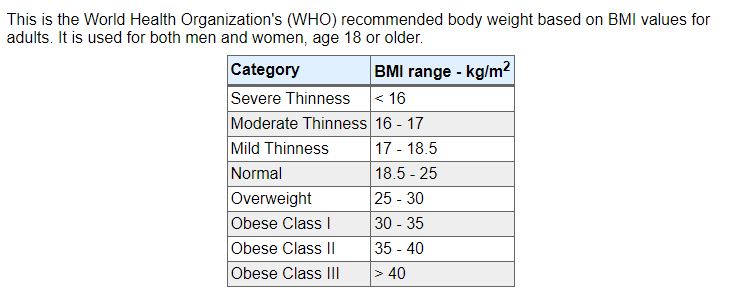

In [ ]:
######Function used to transform BMI Values to categories
def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 1
    elif value>=17 and value<18.5:
        return 2
    elif value>=18.5 and value<25:
        return 3
    elif value>=25 and value<30:
        return 4
    elif value>=30 and value<35:
        return 5
    elif value>=35 and value<40:
        return 6
    elif value>=40 :
        return 7

In [ ]:
data["BMI"] = data["BMI"].apply(transform_bmi)
data["BMI"].value_counts(ascending= False)

In [ ]:
data['AgeCategory']
print(data['AgeCategory'].unique()  , len(data['AgeCategory'].unique()) , 'unique in',feature )

* AgeCategories 
    - young(30<=AgeCategory <35)
    - mature(35<=AgeCategory <50)
    - senior(50<=AgeCategory <65)
    - old(65<=AgeCategory <80)
    - veryold(80<=AgeCategory )

In [ ]:
mapping = {'18-24':0, '25-29': 0, '30-34':0, '35-39':1 , 
           '40-44':1,  '45-49':1, '50-54':2, '55-59':'2', 
           '60-64':'2','65-69':'3', '70-74':'3', '75-79':'3', '80 or older':'4'}


data['AgeCategory'] = data['AgeCategory'].replace(mapping)

In [ ]:
data

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. |  feature selection 👋</div>

Correlation among features

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

#### Remove column name 'Race'

In [ ]:
data['Race']
print(data['Race'].unique()  , len(data['Race'].unique()) , 'unique in',feature )

In [ ]:
data.drop('Race' , axis=1 , inplace=True)

###select feature by class select percentile

In [ ]:
data

In [ ]:
y=data['HeartDisease']
X=data.drop(['HeartDisease'], axis=1)
X.shape

In [ ]:
y.shape

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
#   "K-Neighbors Classifier": KNeighborsClassifier(),
#"Support Vector Classifier": SVC(),
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    
    print(model_name)
    print('Model performance for Training set')
    print("- Train Accuracy: {:.4f}".format(train_accuracy))
    
    print('Model performance for Test set')
    print("- Test Accuracy: {:.4f}".format(test_accuracy))
    print('=' * 35)
    print('\n')


In [ ]:
classification_results = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy'])
# Sort the DataFrame by Accuracy in descending order
classification_results = classification_results.sort_values(by=["Accuracy"], ascending=False)
classification_results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

> > 

# Plot y_pred and y_test

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already trained your random_forest_model and made predictions (y_pred)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the combined confusion matrix
plt.figure(figsize=(6, 4))
plt.title('Combined Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)


###select feature by class SelectFromModel